In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft

<img src= 'Practica_6.jpg' width="600px">

### Miguel Alfonso Zapata de la Cruz 
#### Practica 6 

In [3]:
# 1) First, we need to read the file 
file = np.loadtxt('Data_galaxies_z0695.txt ')  

# 2) now note that we need to identify the central galaxies 
# to do this 


cg_index = np.where(file[:,6] == 0)
c_gal_file = file [cg_index[0], :6]

c_gal_number = c_gal_file.shape[0]


## remember that the Friedmann equation is 
$$
H^2 (z) = H_0^2 \left( \Omega_{m,0}z^3 + \Omega_{r,0} z^4 + \Omega_{k,0} z^2 + \Omega_{\Lambda, 0}   \right )
$$
## note that we need calculate 

$$
s = H_0 d + \frac{v(1+z)}{H(z)}
$$
## for ours cosmology $\Omega_{k,0} = \Omega_{r,0} = 0$. 

In [4]:
# we introduce the cosmology 
Omega_m = 0.3 
Omega_l = 0.7 
H_0 = 70 
# so the Hubble parameter for ours cosmology with
z0695 = 1 + 0.695 
# is 
H = (H_0)*(Omega_m*((z0695)**3) + Omega_l)**(0.5)
z1 = z0695 / H
print('the H_z value for this redshift is', H)

the H_z value for this redshift is 102.90079077077104


In [5]:
#  then, we introduce the positions 
x, y, z = c_gal_file[:,0], c_gal_file[:,1], c_gal_file[:,2]
# and the velocities 
v_x, v_y, v_z = c_gal_file[:,3], c_gal_file[:,4], c_gal_file[:,5]

In [6]:
# 3) now note 
x_s = np.zeros(c_gal_number)
y_s = np.zeros(c_gal_number)
z_s = np.zeros(c_gal_number)

for i in range(c_gal_number): 
    x_s[i] = x[i]
    y_s[i] = y[i]
    z_s[i] = z[i] + z1*v_z[i] 
# using the pixel size 5 
p_s = 5 

# from this pixel size, we can generate the anothers grids, note that 
n = 1000
grid_x, grid_y, grid_z = np.arange(0, n, p_s), np.arange(0, n, p_s), np.arange(0, n, p_s) 

In [13]:
# now we need the array 200 per 200 per 200, so for calculate the density on this array is 
m = 200
dens = np.zeros((m,m,m))
# then we fill the density in each coordinate 

for i in range(c_gal_number):
   
    d_x = abs(grid_x - x[i]) # the distance between x and grid coordinates
    x_min = min(d_x)
    
    x_cen = np.where(d_x == x_min)
    if grid_x[x_cen[0][0]] < x[i]:
        x_dens = x_cen[0][0]
    else:
        x_den = x_cen[0][0] -1
      
    d_y = abs(grid_y - y[i])
    y_min = min(d_y)
    
    y_cen = np.where(d_y == y_min) 
    if grid_y[y_cen[0][0]] < y[i]:
        y_dens = y_cen[0][0]
    else:
        y_dens = y_cen[0][0] -1

    d_z = abs(grid_z - z[i])
    z_min = min(d_z)
    
    z_ind = np.where(d_z == z_min)
    if grid_z[z_ind[0][0]] < z[i]:
        z_dens = z_ind[0][0]
    else:
        z_dens = z_ind[0][0] -1

    dens[x_dens,y_dens, z_dens] += 1

# and for the RSD the function is 
dens_RSD = np.zeros((200,200,200))

for i in range(c_gal_number):
    
    d_xs = abs(grid_x - x_s[i])
    xs_min = min(d_xs)
    
    xs_cen = np.where(d_xs == xs_min)
    if grid_x[xs_cen[0][0]] < x_s[i]:
        xs_dens_RSD = xs_cen[0][0]
    else:
        xs_dens_RSD = xs_cen[0][0] -1
        
    d_ys = abs(grid_y - y_s[i])
    ys_min = min(d_ys)
    
    ys_cen = np.where(d_ys == ys_min)
    if grid_y[ys_cen[0][0]] < y_s[i]:
        ys_dens_RSD = ys_cen[0][0]
    else:
        ys_dens_RSD = ys_cen[0][0] -1
    
    d_zs = abs(grid_z - z_s[i])
    zs_min = min(d_zs)
    
    zs_cen = np.where(d_zs == zs_min)
    if grid_z[zs_ind[0][0]] < z_s[i]:
        zs_dens_RSD = zs_cen[0][0]
    else:
        zs_dens_RSD = zs_cen[0][0] -1

    dens_RSD[xs_dens_RSD,ys_dens_RSD, zs_dens_RSD] += 1

Text(0, 0.5, 'y')

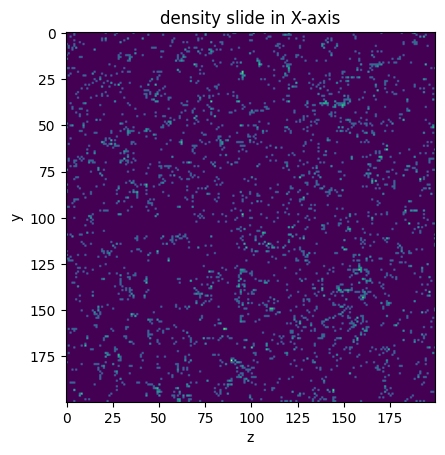

In [14]:

# 4) Now note that log scale and the Plot a slice at a given position in X-axis of the two density cube, is 

plt.title('density slide in X-axis')
plt.imshow(np.log(dens[100,:,:]+1))
plt.xlabel('z')
plt.ylabel('y')

Text(0, 0.5, 'y')

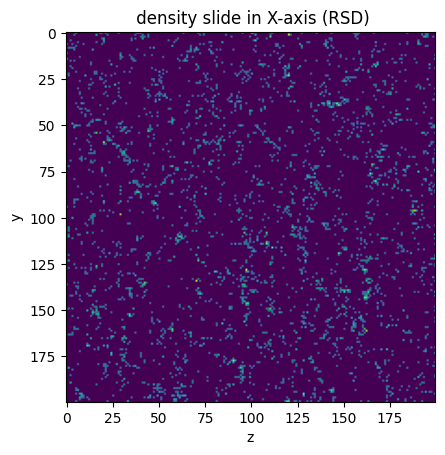

In [15]:

plt.title(' density slide in X-axis (RSD)')
plt.imshow(np.log(dens_RSD[100,:,:]+1))
plt.xlabel('z')
plt.ylabel('y')


# we can to note that the plot without RSD has more sobredensities.

In [16]:
# 5) now we use the code from the exercise two for calculate the Power Spectrum, for the two cube of density. 
# now we need to define the frecuencie 

s_x, s_y, s_z = dens.shape[0], dens.shape[1], dens.shape[2]
k_x, k_y, k_z = fft.fftfreq(s_x), fft.fftfreq(s_y), fft.fftfreq(s_z) 

pk_k = np.linspace(0, 0.9, 50)
d_k = 0.9/49 

#the transform frecuencies is 

dens_fft = np.fft.fftn(dens)
dens_fft_RSD = np.fft.fftn(dens_RSD)

var = np.zeros(len(pk_k))
var_RSD = np.zeros(len(pk_k))
n_s = np.zeros(len(pk_k))

#Luego hay que evaluar dk sobre todas las k
for i in range(len(k_x)):
    for j in range(len(k_y)):
        for l in range(len(k_z)):
            k = ((k_x[i])**2 + (k_y[j])**2 + (k_z[l])**2)**0.5
            index = np.where( (pk_k + d_k/2 > k) & (pk_k - d_k/2 < k) )
            var[index[0]] += np.abs(dens_fft[i][j][l])**2 
            var_RSD[index[0]] += np.abs(dens_fft_RSD[i][j][l])**2
            n_s[index[0]] += 1


In [19]:
var_arr = np.zeros(len(var))
var_arr_RSD = np.zeros(len(var_RSD))

for j in range(len(var)):
    var_arr[j] = var[j]/n_s[j]
    var_arr_RSD[j] = var_RSD[j]/n_s[j]


/tmp/ipykernel_4938/2480970271.py:5: RuntimeWarning: invalid value encountered in scalar divide
  var_arr[j] = var[j]/n_s[j]
/tmp/ipykernel_4938/2480970271.py:6: RuntimeWarning: invalid value encountered in scalar divide
  var_arr_RSD[j] = var_RSD[j]/n_s[j]


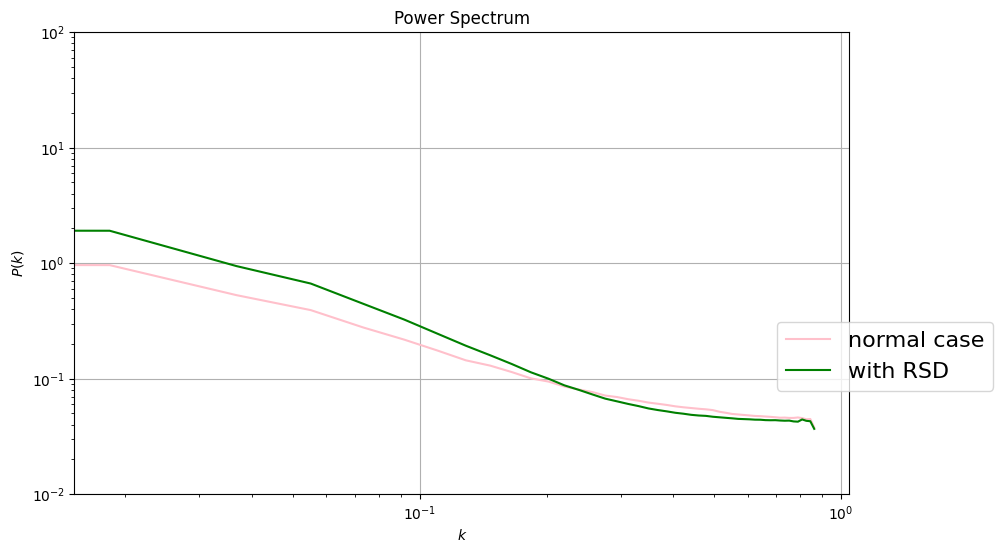

In [35]:
grid_N = grid_x.shape[0] -1
lin = p_s*grid_N
norm = (lin**3)/grid_N**6

Pk_arr, Pk_arr_RSD  = norm*(1/(2*np.pi)**(3))*var_arr, norm*(1/(2*np.pi)**(3))*var_arr_RSD

plt.loglog(pk_k,Pk_arr,color='pink',label=r'normal case')
plt.loglog(pk_k,Pk_arr_RSD,color='green',label=r'with RSD')
plt.legend(loc='lower right',bbox_to_anchor=(1.2, 0.2), fontsize=16)
plt.title('Power Spectrum')
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.ylim(0.01,100)
plt.grid()
plt.show()



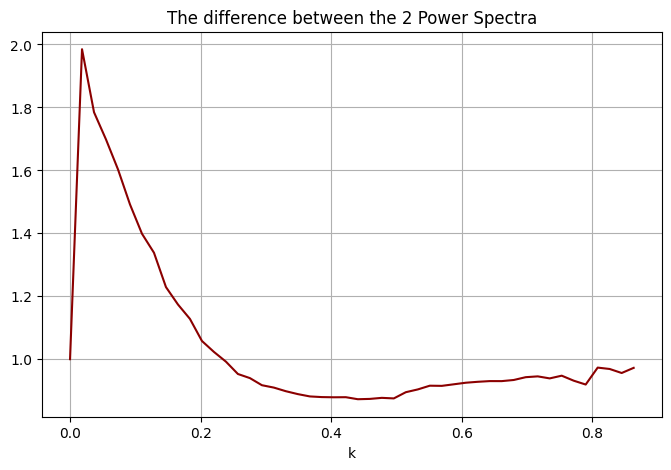

In [55]:
# 7) note that using the values for the growth factor fotr the simulation 
f = 0.81
b = 2.1
c = f/b
# we calculate 
coc = Pk_arr_RSD/Pk_arr
# and using the formula for the difference between the 2 Power Spectra
dif = 1 + (2/3)*c + (1/5)*c**2
plt.plot(pk_k,coc, color='darkred')
plt.title('The difference between the 2 Power Spectra')
plt.xlabel('k')
plt.grid()
plt.show()
